# 1 数据处理与清洗

## 1.1 加载数据

In [1]:
import chardet

with open("datasets/dataset_ubicomp2013_tips.txt", "rb") as f:
    result = chardet.detect(f.read())
    print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [2]:
import pandas as pd

# 加载签到数据
checkins = pd.read_csv("datasets/dataset_ubicomp2013_checkins.txt", sep="\t", header=None, names=["user_id", "venue_id"], encoding="ISO-8859-1")

# 加载评论数据
tips = pd.read_csv("datasets/dataset_ubicomp2013_tips.txt", sep="\t", header=None, names=["user_id", "venue_id", "tip_text"], encoding="ISO-8859-1")

# 加载标签数据
tags = pd.read_csv("datasets/dataset_ubicomp2013_tags.txt", sep="\t", header=None, names=["venue_id", "tags"], encoding="ISO-8859-1")

## 1.2 数据检查

In [3]:
# 检查缺失值
print("签到数据缺失值统计：")
print(checkins.isnull().sum())

print("\n评论数据缺失值统计：")
print(tips.isnull().sum())

print("\n标签数据缺失值统计：")
print(tags.isnull().sum())

签到数据缺失值统计：
user_id     0
venue_id    0
dtype: int64

评论数据缺失值统计：
user_id     0
venue_id    0
tip_text    0
dtype: int64

标签数据缺失值统计：
venue_id      0
tags        695
dtype: int64


In [4]:
# 检查重复值
print("\n签到数据重复值数量：", checkins.duplicated().sum())
print("评论数据重复值数量：", tips.duplicated().sum())
print("标签数据重复值数量：", tags.duplicated().sum())


签到数据重复值数量： 13677
评论数据重复值数量： 66
标签数据重复值数量： 0


## 1.3 数据清洗

In [3]:
# 处理缺失值
# 对于标签数据中的缺失值，用空字符串填充
tags["tags"] = tags["tags"].fillna("")

In [4]:
# 删除重复值
checkins = checkins.drop_duplicates()
tips = tips.drop_duplicates()
tags = tags.drop_duplicates()

## 1.4 数据类型转换

In [5]:
# 确保 user_id 和 venue_id 为整数类型
checkins["user_id"] = checkins["user_id"].astype(int)
checkins["venue_id"] = checkins["venue_id"].astype(int)

tips["user_id"] = tips["user_id"].astype(int)
tips["venue_id"] = tips["venue_id"].astype(int)

tags["venue_id"] = tags["venue_id"].astype(int)

In [8]:
# 打印清洗后的数据集信息
print("\n清洗后的签到数据：")
print(checkins.info())

print("\n清洗后的评论数据：")
print(tips.info())

print("\n清洗后的标签数据：")
print(tags.info())


清洗后的签到数据：
<class 'pandas.core.frame.DataFrame'>
Index: 13472 entries, 0 to 27147
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   user_id   13472 non-null  int64
 1   venue_id  13472 non-null  int64
dtypes: int64(2)
memory usage: 315.8 KB
None

清洗后的评论数据：
<class 'pandas.core.frame.DataFrame'>
Index: 10311 entries, 0 to 10376
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   10311 non-null  int64 
 1   venue_id  10311 non-null  int64 
 2   tip_text  10311 non-null  object
dtypes: int64(2), object(1)
memory usage: 322.2+ KB
None

清洗后的标签数据：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3298 entries, 0 to 3297
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   venue_id  3298 non-null   int64 
 1   tags      3298 non-null   object
dtypes: int64(1), object(1)
memory usage: 51.7+ KB
None


# 2 数据可视化

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置显示中文和负号
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文
plt.rcParams['axes.unicode_minus'] = False # 显示负号

## 2.1 用户行为分析

### 2.1.1 用户签到分布

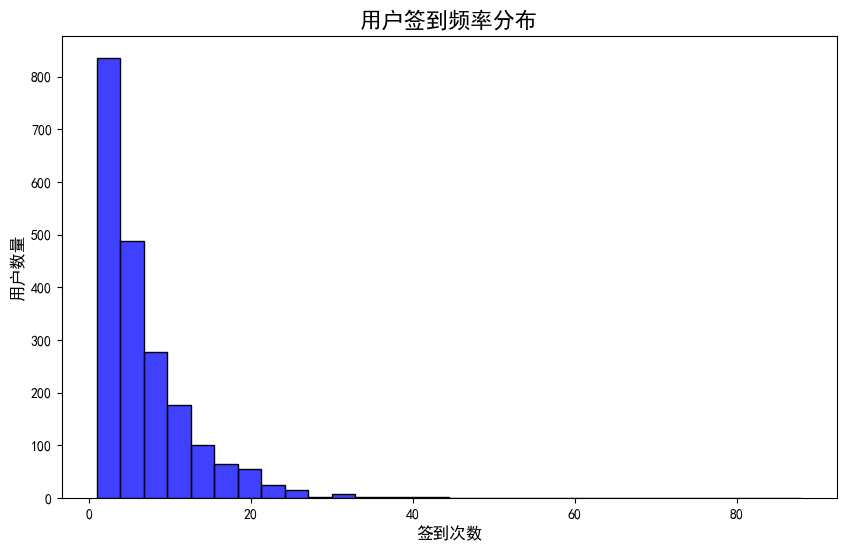

In [12]:
# 统计每个用户的签到次数
user_checkin_counts = checkins['user_id'].value_counts()

# 绘制签到频率分布
plt.figure(figsize=(10, 6))
sns.histplot(user_checkin_counts, bins=30, kde=False, color='blue')
plt.title("用户签到频率分布", fontsize=16)
plt.xlabel("签到次数", fontsize=12)
plt.ylabel("用户数量", fontsize=12)
plt.show()

### 2.1.2 用户签到的热门餐厅

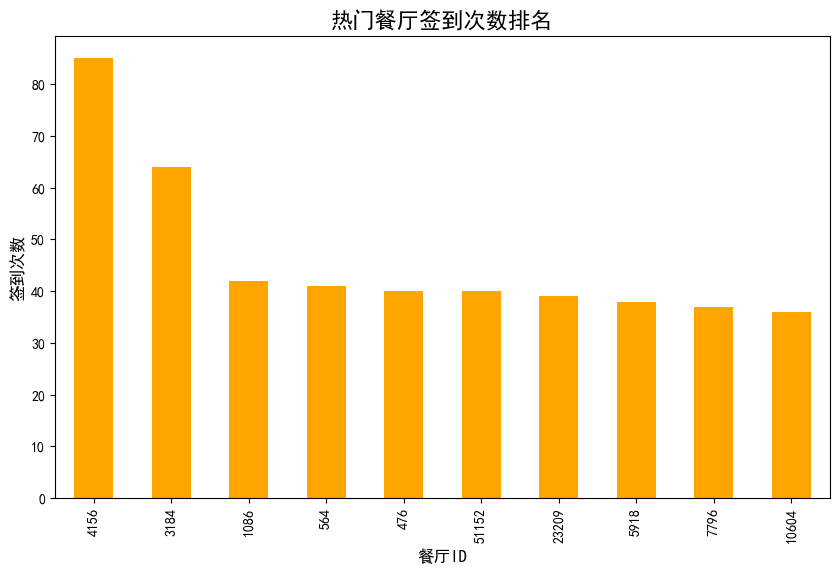

In [15]:
# 统计每个餐厅的签到次数
venue_checkin_counts = checkins['venue_id'].value_counts()

# 绘制餐厅签到次数排名
plt.figure(figsize=(10, 6))
venue_checkin_counts.head(10).plot(kind='bar', color='orange')
plt.title("热门餐厅签到次数排名", fontsize=16)
plt.xlabel("餐厅ID", fontsize=12)
plt.ylabel("签到次数", fontsize=12)
plt.show()

## 2.2 餐厅特征分析

### 2.2.1 餐厅类型分布

C:\Users\avawa\AppData\Local\Temp\ipykernel_34344\3026294379.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tag_counts_df.head(10), x='tag', y='count', palette='viridis')


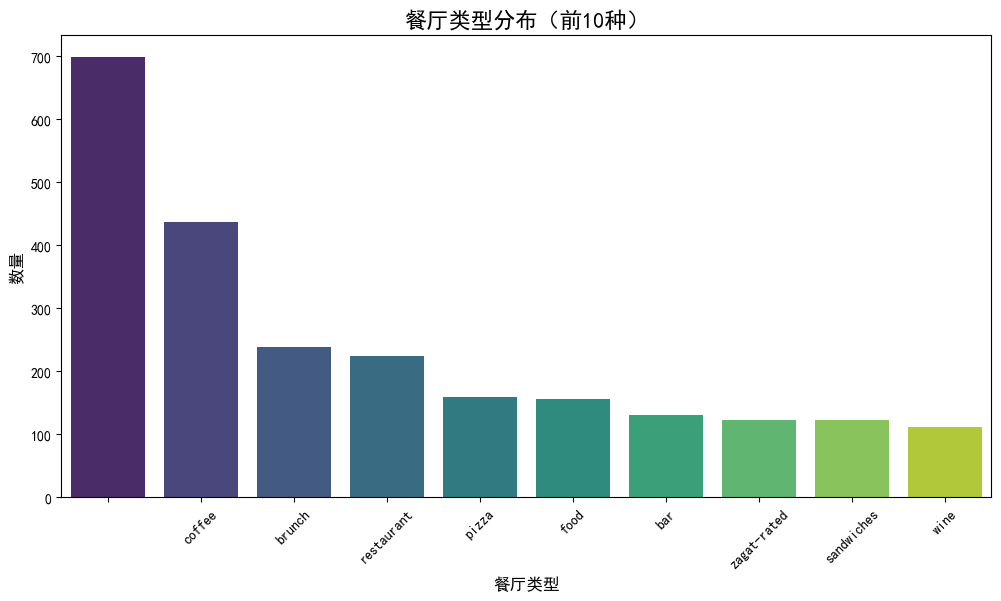

In [13]:
from collections import Counter

# 分割标签并统计每种类型的数量
tags['tags'] = tags['tags'].fillna("")  # 处理空标签
all_tags = tags['tags'].str.split(",").sum()  # 将所有标签展开为列表
tag_counts = Counter(all_tags)  # 统计每种标签的数量

# 转换为 DataFrame
tag_counts_df = pd.DataFrame(tag_counts.items(), columns=['tag', 'count']).sort_values(by='count', ascending=False)

# 绘制餐厅类型分布
plt.figure(figsize=(12, 6))
sns.barplot(data=tag_counts_df.head(10), x='tag', y='count', palette='viridis')
plt.title("餐厅类型分布（前10种）", fontsize=16)
plt.xlabel("餐厅类型", fontsize=12)
plt.ylabel("数量", fontsize=12)
plt.xticks(rotation=45)
plt.show()

### 2.2.2 餐厅签到热度

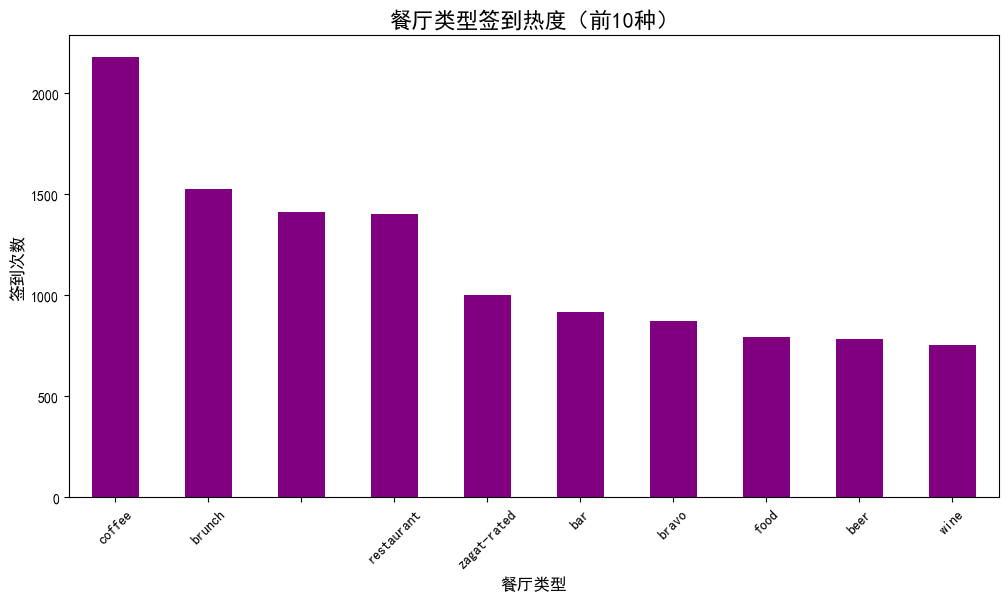

In [16]:
# 合并签到数据和标签数据
checkins_with_tags = pd.merge(checkins, tags, on='venue_id', how='left')

# 统计每种餐厅类型的签到次数
tag_checkin_counts = checkins_with_tags['tags'].str.split(",").explode().value_counts()

# 绘制餐厅类型签到热度
plt.figure(figsize=(12, 6))
tag_checkin_counts.head(10).plot(kind='bar', color='purple')
plt.title("餐厅类型签到热度（前10种）", fontsize=16)
plt.xlabel("餐厅类型", fontsize=12)
plt.ylabel("签到次数", fontsize=12)
plt.xticks(rotation=45)
plt.show()

## 2.3 评论数据分析

### 2.3.1 评论长度分布

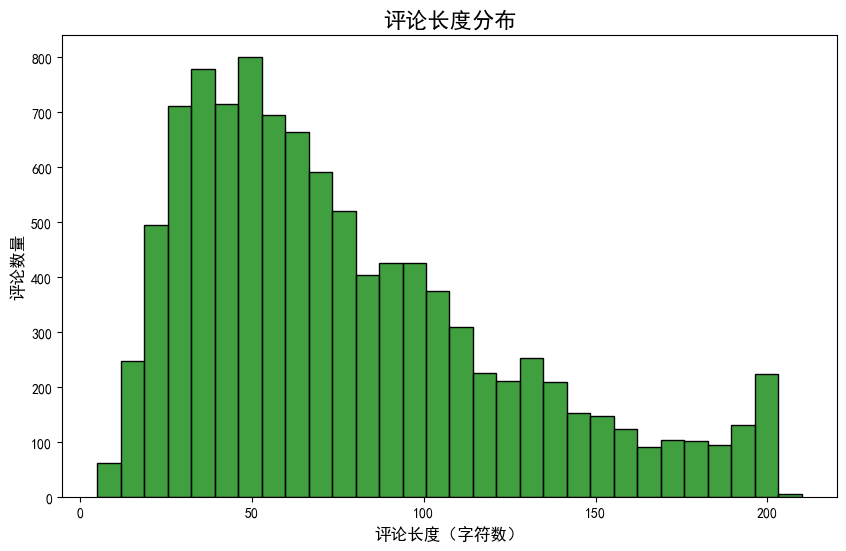

In [17]:
# 计算评论长度
tips['tip_length'] = tips['tip_text'].apply(len)

# 绘制评论长度分布
plt.figure(figsize=(10, 6))
sns.histplot(tips['tip_length'], bins=30, kde=False, color='green')
plt.title("评论长度分布", fontsize=16)
plt.xlabel("评论长度（字符数）", fontsize=12)
plt.ylabel("评论数量", fontsize=12)
plt.show()

### 2.3.2 评论关键词分析

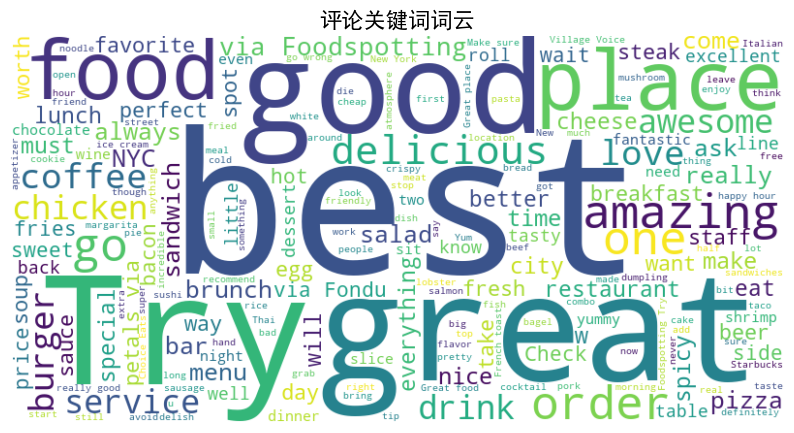

In [14]:
from wordcloud import WordCloud

# 将所有评论合并为一个字符串
all_tips = " ".join(tips['tip_text'])

# 生成词云
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tips)

# 显示词云
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("评论关键词词云", fontsize=16)
plt.show()

# 3 特征工程

## 3.1 用户特征

In [6]:
# 用户签到次数：统计每个用户的签到总次数，作为用户活跃度的衡量指标
user_checkin_counts = checkins['user_id'].value_counts().reset_index()
user_checkin_counts.columns = ['user_id', 'checkin_count']

In [7]:
# 导入必要的库
from collections import Counter

# 合并签到数据和标签数据
checkins_with_tags = pd.merge(checkins, tags, on='venue_id', how='left')

# 用户签到的餐厅类型分布：统计每个用户签到的餐厅类型分布，作为用户偏好的特征
user_tag_counts = checkins_with_tags.groupby('user_id')['tags'].apply(lambda x: ','.join(x.dropna())).reset_index()
user_tag_counts['tag_distribution'] = user_tag_counts['tags'].apply(lambda x: Counter(x.split(',')))
user_tag_counts = user_tag_counts[['user_id', 'tag_distribution']]

In [8]:
# 用户评论数量：统计每个用户签到的餐厅类型分布，作为用户偏好的特征
user_tip_counts = tips['user_id'].value_counts().reset_index()
user_tip_counts.columns = ['user_id', 'tip_count']

In [9]:
# 用户评论的平均长度：计算每个用户评论的平均长度，反映用户对餐厅的关注程度
user_tip_length = tips.groupby('user_id')['tip_text'].apply(lambda x: x.str.len().mean()).reset_index()
user_tip_length.columns = ['user_id', 'avg_tip_length']

## 3.2 餐厅特征

In [10]:
# 餐厅签到次数：统计每个餐厅的签到总次数，作为餐厅受欢迎程度的衡量指标
venue_checkin_counts = checkins['venue_id'].value_counts().reset_index()
venue_checkin_counts.columns = ['venue_id', 'checkin_count']

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# 餐厅标签多热编码：将餐厅的标签（tags）进行多热编码，作为餐厅的类型特征
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(','))
tag_matrix = vectorizer.fit_transform(tags['tags'].fillna(''))
tag_features = pd.DataFrame(tag_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tag_features['venue_id'] = tags['venue_id']

/opt/anaconda3/envs/pytorch310/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [12]:
# 餐厅评论数量：统计每个餐厅的评论数量，作为餐厅受欢迎程度的补充特征
venue_tip_counts = tips['venue_id'].value_counts().reset_index()
venue_tip_counts.columns = ['venue_id', 'tip_count']

In [13]:
# 餐厅评论的平均长度：计算每个餐厅评论的平均长度，反映餐厅的用户评价质量
venue_tip_length = tips.groupby('venue_id')['tip_text'].apply(lambda x: x.str.len().mean()).reset_index()
venue_tip_length.columns = ['venue_id', 'avg_tip_length']

## 3.3 用户与餐厅交互特征

In [14]:
# 用户对餐厅的签到次数：统计每个用户对每个餐厅的签到次数，作为用户与餐厅交互的强度特征
user_venue_checkins = checkins.groupby(['user_id', 'venue_id']).size().reset_index(name='checkin_count')

In [15]:
# 用户对餐厅的评论次数：统计每个用户对每个餐厅的评论次数，作为用户与餐厅交互的补充特征
user_venue_tips = tips.groupby(['user_id', 'venue_id']).size().reset_index(name='tip_count')

In [16]:
from textblob import TextBlob

# 计算评论情感得分
tips['sentiment'] = tips['tip_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# 用户对餐厅的平均情感得分：对每条评论进行情感分析，计算每个用户对每个餐厅的平均情感得分
user_venue_sentiment = tips.groupby(['user_id', 'venue_id'])['sentiment'].mean().reset_index()
user_venue_sentiment.columns = ['user_id', 'venue_id', 'avg_sentiment']

## 3.4 特征整合

In [17]:
# 合并用户特征
user_features = pd.merge(user_checkin_counts, user_tip_counts, on='user_id', how='left')
user_features = pd.merge(user_features, user_tip_length, on='user_id', how='left')
user_features = pd.merge(user_features, user_tag_counts, on='user_id', how='left')

In [18]:
# 合并餐厅特征
venue_features = pd.merge(venue_checkin_counts, venue_tip_counts, on='venue_id', how='left')
venue_features = pd.merge(venue_features, venue_tip_length, on='venue_id', how='left')
venue_features = pd.merge(venue_features, tag_features, on='venue_id', how='left')

In [19]:
# 合并交互特征
interaction_features = pd.merge(user_venue_checkins, user_venue_tips, on=['user_id', 'venue_id'], how='left')
interaction_features = pd.merge(interaction_features, user_venue_sentiment, on=['user_id', 'venue_id'], how='left')

## 3.5 查看特征工程处理后的数据

### 3.5.1 用户特征表

In [24]:
print("用户特征表信息：")
print(user_features.info())
print("\n前5行数据：")
print(user_features.head())

用户特征表信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2060 entries, 0 to 2059
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           2060 non-null   int64  
 1   checkin_count     2060 non-null   int64  
 2   tip_count         2060 non-null   int64  
 3   avg_tip_length    2060 non-null   float64
 4   tag_distribution  2060 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 80.6+ KB
None

前5行数据：
   user_id  checkin_count  tip_count  avg_tip_length  \
0    45720             88          4      118.000000   
1    21501             52          5      101.200000   
2    25321             44          1      200.000000   
3    21380             42         27      106.925926   
4   247092             40          2       32.000000   

                                    tag_distribution  
0  {'burrito': 1, 'mole': 1, 'wu tang': 1, 'byob'...  
1  {'cafe': 1, 'coffee': 4, 'free

### 3.5.2 餐厅特征表

In [25]:
# 查看餐厅表的主要列（非标签列）
main_columns = ['venue_id', 'checkin_count', 'tip_count', 'avg_tip_length']
print("\n餐厅特征表主要列：")
print(venue_features[main_columns].head())

# 查看标签列的统计信息
tag_columns = [col for col in venue_features.columns if col not in main_columns]
print(f"\n标签列数量: {len(tag_columns)}")

# 计算每个餐厅的标签数量
venue_features['tag_count'] = venue_features[tag_columns].sum(axis=1)
print("\n每个餐厅的标签数量统计：")
print(venue_features['tag_count'].describe())


餐厅特征表主要列：
   venue_id  checkin_count  tip_count  avg_tip_length
0      4156             85         17       80.647059
1      3184             64         26       83.730769
2      1086             42         21       86.333333
3       564             41         20       69.800000
4       476             40         17       88.764706

标签列数量: 4175

每个餐厅的标签数量统计：
count    2876.000000
mean        4.645688
std         4.583143
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        60.000000
Name: tag_count, dtype: float64


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 将标签重新组合为文本
# 首先创建一个标签存在与否的DataFrame（1表示存在，0表示不存在）
tag_presence = venue_features[tag_columns].apply(lambda x: x > 0).astype(int)

# 对于每个餐厅，将所有值为1的标签合并为一个字符串
venue_tags = []
for _, row in tag_presence.iterrows():
    # 获取值为1的列名（即标签）
    tags = [col for col, val in row.items() if val == 1]
    venue_tags.append(" ".join(tags))

# 使用TF-IDF向量化标签文本
vectorizer = TfidfVectorizer(max_features=100)  # 最多保留100个特征
tfidf_matrix = vectorizer.fit_transform(venue_tags)

# 转换为DataFrame
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(), 
    columns=vectorizer.get_feature_names_out()
)

# 合并主要特征和TF-IDF特征
venue_features_tfidf = pd.concat([venue_features[main_columns].reset_index(drop=True), 
                                 tfidf_df], axis=1)

In [27]:
print("\n使用TF-IDF处理后的餐厅特征表：")
print(venue_features_tfidf.info())
print(venue_features_tfidf.head())


使用TF-IDF处理后的餐厅特征表：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2876 entries, 0 to 2875
Columns: 104 entries, venue_id to zagat
dtypes: float64(101), int64(3)
memory usage: 2.3 MB
None
   venue_id  checkin_count  tip_count  avg_tip_length        24       and  \
0      4156             85         17       80.647059  0.000000  0.000000   
1      3184             64         26       83.730769  0.000000  0.000000   
2      1086             42         21       86.333333  0.467092  0.000000   
3       564             41         20       69.800000  0.513216  0.221735   
4       476             40         17       88.764706  0.000000  0.000000   

   area  asian  bagels    bakery  ...  the       top    trendy  vegan  \
0   0.0    0.0     0.0  0.245484  ...  0.0  0.000000  0.000000    0.0   
1   0.0    0.0     0.0  0.000000  ...  0.0  0.000000  0.000000    0.0   
2   0.0    0.0     0.0  0.000000  ...  0.0  0.000000  0.000000    0.0   
3   0.0    0.0     0.0  0.000000  ...  0.0  0.247959  

### 3.5.3 交互特征表

In [28]:
print("\n交互特征表信息：")
print(interaction_features.info())
print("\n前5行数据：")
print(interaction_features.head())


交互特征表信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13472 entries, 0 to 13471
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        13472 non-null  int64  
 1   venue_id       13472 non-null  int64  
 2   checkin_count  13472 non-null  int64  
 3   tip_count      1350 non-null   float64
 4   avg_sentiment  1350 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 526.4 KB
None

前5行数据：
   user_id  venue_id  checkin_count  tip_count  avg_sentiment
0        6       278              1        NaN            NaN
1       15       910              1        NaN            NaN
2       15      1070              1        NaN            NaN
3       15      1254              1        NaN            NaN
4       15      1329              1        NaN            NaN


## 3.6 储存处理后数据

In [29]:
# 存储用户特征表
user_features.to_csv('data/user_features.csv', index=False)

# 存储餐厅特征表
venue_features.to_csv('data/venue_features.csv', index=False)

# 存储交互特征表
interaction_features.to_csv('data/interaction_features.csv', index=False)

# 4 推荐系统模型

## 4.1 ALS模型原理

In [ ]:
# ALS模型原理解析
"""
ALS（交替最小二乘法）原理：

1. 基本思想：将用户-物品交互矩阵分解为两个低维矩阵的乘积：R ≈ P × Q^T
   - R: 用户-物品评分/交互矩阵
   - P: 用户特征矩阵
   - Q: 物品特征矩阵

2. 对于隐式反馈，ALS使用加权损失函数：
   L = Σ c_ui (p_ui - x_ui)² + λ(||P||² + ||Q||²)
   其中：
   - c_ui: 置信度权重，通常设为 1 + α·r_ui
   - p_ui: 预测评分/喜好
   - x_ui: 观察到的隐式反馈值
   - λ: 正则化参数，防止过拟合

3. 优化方法：交替优化P和Q
   - 固定Q，优化P
   - 固定P，优化Q
   - 重复直到收敛

4. 优点：
   - 可并行计算
   - 适合稀疏数据
   - 处理隐式反馈效果好

5. 超参数：
   - rank: 隐因子维度
   - alpha: 置信度系数
   - regParam: 正则化参数
"""

## 4.2 环境准备与数据加载

In [20]:
# 导入必要的库
import numpy as np
from pyspark.sql import SparkSession
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import col

# 设置中文显示
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  
mpl.rcParams['axes.unicode_minus'] = False

# 创建Spark会话
spark = SparkSession.builder \
    .appName("Restaurant Recommendation") \
    .getOrCreate()

# 加载数据
user_features_pd = pd.read_csv('data/user_features.csv')
interaction_features_pd = pd.read_csv('data/interaction_features.csv')

# 转换为Spark DataFrame
user_features = spark.createDataFrame(user_features_pd)
interaction_features = spark.createDataFrame(interaction_features_pd)

# 查看数据概要
print("交互数据概览:")
interaction_features.printSchema()
interaction_features.show(5)

print("用户数量:", interaction_features.select("user_id").distinct().count())
print("餐厅数量:", interaction_features.select("venue_id").distinct().count())
print("交互总数:", interaction_features.count())

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/04/10 09:21:31 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


交互数据概览:
root
 |-- user_id: long (nullable = true)
 |-- venue_id: long (nullable = true)
 |-- checkin_count: long (nullable = true)
 |-- tip_count: double (nullable = true)
 |-- avg_sentiment: double (nullable = true)



+-------+--------+-------------+---------+-------------+
|user_id|venue_id|checkin_count|tip_count|avg_sentiment|
+-------+--------+-------------+---------+-------------+
|      6|     278|            1|      NaN|          NaN|
|     15|     910|            1|      NaN|          NaN|
|     15|    1070|            1|      NaN|          NaN|
|     15|    1254|            1|      NaN|          NaN|
|     15|    1329|            1|      NaN|          NaN|
+-------+--------+-------------+---------+-------------+
only showing top 5 rows



用户数量: 2060


餐厅数量: 2876
交互总数: 13472


## 4.3 数据预处理与转换

In [22]:
# 为ALS模型准备数据
def prepare_als_data(interaction_df):
    """准备用于ALS模型的数据"""
    # 1. 确保评分/交互值存在
    if 'checkin_count' not in interaction_df.columns:
        raise ValueError("数据中需要有checkin_count列")
    
    # 2. 重命名列以符合ALS需求
    als_data = interaction_df.select(
        col('user_id').alias('user'),
        col('venue_id').alias('item'),
        col('checkin_count').alias('rating')
    )
    
    # 3. 处理缺失值，ALS不支持缺失值
    als_data = als_data.na.fill(1)  # 将缺失的交互次数设为1
    
    return als_data

# 准备训练数据
als_data = prepare_als_data(interaction_features)
print("ALS模型数据概览:")
als_data.show(5)

# 分割训练集和测试集
train_data, test_data = als_data.randomSplit([0.8, 0.2], seed=42)
print(f"训练集大小: {train_data.count()}")
print(f"测试集大小: {test_data.count()}")

ALS模型数据概览:
+----+----+------+
|user|item|rating|
+----+----+------+
|   6| 278|     1|
|  15| 910|     1|
|  15|1070|     1|
|  15|1254|     1|
|  15|1329|     1|
+----+----+------+
only showing top 5 rows



训练集大小: 10871


测试集大小: 2601


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# 计算交互次数分布
interaction_counts = interaction_features_pd['checkin_count'].value_counts().sort_index()

# 查看基本统计信息
print("交互次数统计信息:")
print(f"最小值: {interaction_counts.index.min()}")
print(f"最大值: {interaction_counts.index.max()}")
print(f"唯一值数量: {len(interaction_counts)}")

交互次数统计信息:
最小值: 1
最大值: 1
唯一值数量: 1


In [27]:
# 检查原始数据中的用户-餐厅交互情况
print("原始交互数据样例:")
print(interaction_features_pd.head())

# 检查是否有用户ID和餐厅ID重复出现的情况
user_rest_counts = interaction_features_pd.groupby(['user_id', 'venue_id']).size().reset_index(name='true_count')
print("\n用户-餐厅对的交互次数统计:")
print(user_rest_counts['true_count'].value_counts())

# 检查checkin_count字段是如何计算的
print("\ninteraction_features_pd的前几行:")
print(interaction_features_pd[['user_id', 'venue_id', 'checkin_count']].head())

原始交互数据样例:
   user_id  venue_id  checkin_count  tip_count  avg_sentiment
0        6       278              1        NaN            NaN
1       15       910              1        NaN            NaN
2       15      1070              1        NaN            NaN
3       15      1254              1        NaN            NaN
4       15      1329              1        NaN            NaN

用户-餐厅对的交互次数统计:
true_count
1    13472
Name: count, dtype: int64

interaction_features_pd的前几行:
   user_id  venue_id  checkin_count
0        6       278              1
1       15       910              1
2       15      1070              1
3       15      1254              1
4       15      1329              1


每个用户的交互餐厅数统计:
count    2060.000000
mean        6.539806
std         6.321857
min         1.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        88.000000
dtype: float64


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/opt/anaconda3/envs/pytorch310/lib/python3.10/

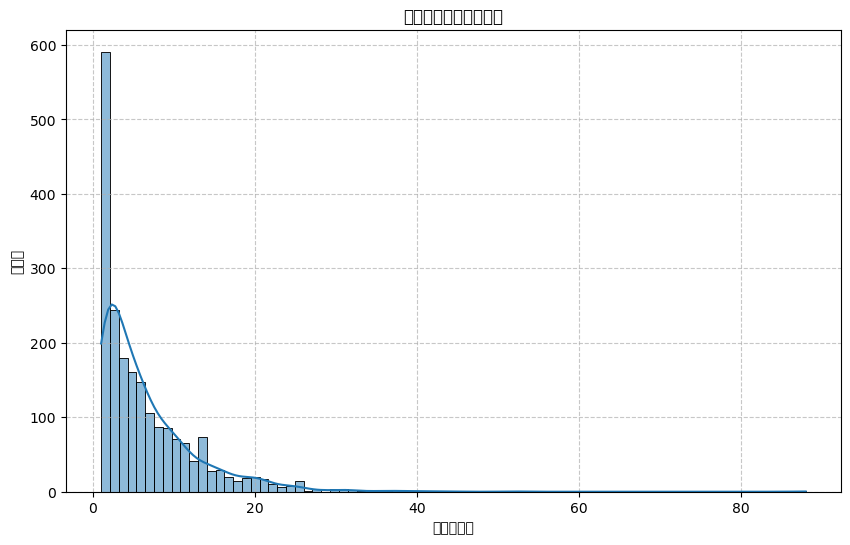


每个餐厅的交互用户数统计:
count    2876.000000
mean        4.684284
std         5.120167
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        85.000000
dtype: float64


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/opt/anaconda3/envs/pytorch310/lib/python3.10/

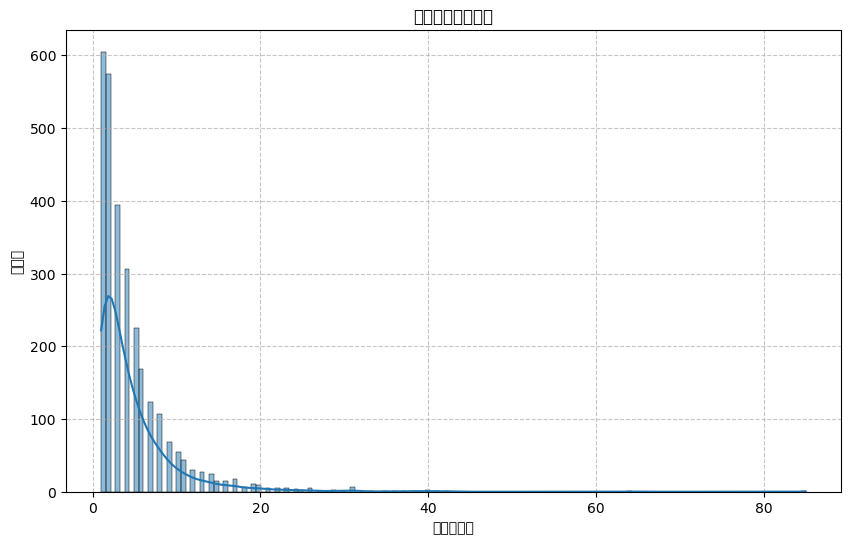

In [28]:
# 由于所有checkin_count都是1，可以将其视为二元交互数据
# 检查用户的交互分布情况
user_interaction_counts = interaction_features_pd.groupby('user_id').size()
print("每个用户的交互餐厅数统计:")
print(user_interaction_counts.describe())

# 可视化用户交互分布
plt.figure(figsize=(10, 6))
sns.histplot(user_interaction_counts, kde=True)
plt.title('用户交互餐厅数量分布')
plt.xlabel('交互餐厅数')
plt.ylabel('用户数')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 检查餐厅的受欢迎程度分布
venue_popularity = interaction_features_pd.groupby('venue_id').size()
print("\n每个餐厅的交互用户数统计:")
print(venue_popularity.describe())

# 可视化餐厅受欢迎度分布
plt.figure(figsize=(10, 6))
sns.histplot(venue_popularity, kde=True)
plt.title('餐厅受欢迎度分布')
plt.xlabel('交互用户数')
plt.ylabel('餐厅数')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()